<a href="https://colab.research.google.com/github/19522224/CS114.L21/blob/master/scoreprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessor Data**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import sqlite3

conn = sqlite3.connect('Driver={SQL Server};'
                      'Server=RON\SQLEXPRESS;'
                      'Database=TestDB;'
                      'Trusted_Connection=yes;')
cur = conn.cursor()

In [ ]:

score=pd.read_excel('./score_training.xlsx')
score.head()

In [ ]:
score.to_sql('SCORE', conn, if_exists='replace', index=False)
data_score=pd.DataFrame(cur.execute('SELECT id, CK FROM SCORE  GROUP BY id'))


In [ ]:
data_score.rename(columns = {list(data_score)[0]:'user_id'}, inplace=True)
data_score.rename(columns = {list(data_score)[1]:'CK'}, inplace=True)
data_score.head(50)

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
5,30,9
6,34,6.5
7,35,4.5
8,36,7
9,37,7.5


In [ ]:
wecode=pd.read_excel('./wecode.xlsx')
wecode.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [ ]:
wecode.describe()
wecode.to_sql('WECODE', conn, if_exists='replace', index=False)

In [ ]:
new_data=pd.DataFrame(cur.execute('SELECT user_id FROM wecode GROUP BY user_id'))
new_data.rename(columns = {list(new_data)[0]:'user_id'}, inplace=True)
new_data.head()

,user_id
0,1
1,4
2,5
3,6
4,7


In [ ]:
#1 Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit
new_data['prob_solved/prob_submit']=pd.DataFrame(pd.DataFrame(cur.execute('SELECT COUNT(*) FROM wecode WHERE (is_final = 1 AND pre_score=10000) GROUP BY user_id'))/pd.DataFrame(cur.execute('SELECT COUNT(DISTINCT problem_id)FROM wecode GROUP BY user_id')))
new_data.head()

,user_id,prob_solved/prob_submit
0,1,0.500000
1,4,0.902439
2,5,0.600000
3,6,0.965909
4,7,4.500000


In [ ]:
#2 Tổng số problem đã sumbit / Tổng số submissions 
new_data['prob_sumbit/submissions']=pd.DataFrame(pd.DataFrame(cur.execute('SELECT COUNT(DISTINCT problem_id)FROM wecode GROUP BY user_id'))/pd.DataFrame(cur.execute('SELECT COUNT(*)FROM wecode GROUP BY user_id')))
new_data.head()

,user_id,prob_solved/prob_submit,prob_sumbit/submissions
0,1,0.500000,1.000000
1,4,0.902439,0.759259
2,5,0.600000,0.833333
3,6,0.965909,0.676923
4,7,4.500000,0.400000


In [ ]:
#3 Số lần submit đúng (pre_score=10000) / tổng số submissions
new_data['right_sumbit/submissions']=pd.DataFrame(pd.DataFrame(cur.execute('SELECT COUNT(*) FROM wecode WHERE pre_score=10000 GROUP BY user_id'))/pd.DataFrame(cur.execute('SELECT COUNT(*)FROM wecode GROUP BY user_id')))
new_data.head()

,user_id,prob_solved/prob_submit,prob_sumbit/submissions,right_sumbit/submissions
0,1,0.500000,1.000000,0.500000
1,4,0.902439,0.759259,0.814815
2,5,0.600000,0.833333,0.500000
3,6,0.965909,0.676923,0.684615
4,7,4.500000,0.400000,3.800000


In [ ]:
#4 Tổng pre_score của các submssion có is_final = 1 
new_data['sum_is_final_1']=pd.DataFrame(cur.execute('SELECT COUNT(*) FROM wecode WHERE is_final = 1 GROUP BY user_id'))
new_data.head()

,user_id,prob_solved/prob_submit,prob_sumbit/submissions,right_sumbit/submissions,sum_is_final_1
0,1,0.500000,1.000000,0.500000,2.0
1,4,0.902439,0.759259,0.814815,38.0
2,5,0.600000,0.833333,0.500000,5.0
3,6,0.965909,0.676923,0.684615,88.0
4,7,4.500000,0.400000,3.800000,2.0


In [ ]:
#5 Trung bình của Tỷ lệ: problem đã submit/số lượng problem của mỗi assignments

In [ ]:
#6 Tổng của max pre_score của mỗi problem_id
new_data['sum_max_scores']=pd.DataFrame(cur.execute('SELECT SUM(max_score) FROM (SELECT user_id, problem_id, MAX(pre_score) AS max_score FROM wecode GROUP BY user_id, problem_id) GROUP BY user_id'))
new_data.head(50)

,user_id,prob_solved/prob_submit,prob_sumbit/submissions,right_sumbit/submissions,sum_is_final_1,sum_max_scores,CK
0,1,0.500000,1.000000,0.500000,2.0,10000,NaN
1,4,0.902439,0.759259,0.814815,38.0,400000,NaN
2,5,0.600000,0.833333,0.500000,5.0,30000,NaN
3,6,0.965909,0.676923,0.684615,88.0,850000,NaN
4,7,4.500000,0.400000,3.800000,2.0,9209,NaN
5,11,0.333333,0.360000,0.140000,12.0,145601,NaN
6,14,6.428571,0.318182,2.545455,7.0,68000,NaN
7,15,0.240000,0.495050,0.118812,52.0,458666,NaN
8,20,6.000000,0.923077,6.153846,12.0,120000,NaN
9,24,0.038462,0.475610,0.024390,77.0,760299,9.5


In [ ]:
#7 trung bình cộng (thời điểm submit cuối cùng - thời điểm submit đầu tiên của mỗi problem)

In [ ]:
 new_data=pd.merge(new_data,data_score,on='user_id',how='left')
 new_data.head(50)

,user_id,prob_solved/prob_submit,prob_sumbit/submissions,right_sumbit/submissions,sum_is_final_1,sum_max_scores,CK
0,1,0.500000,1.000000,0.500000,2.0,10000,NaN
1,4,0.902439,0.759259,0.814815,38.0,400000,NaN
2,5,0.600000,0.833333,0.500000,5.0,30000,NaN
3,6,0.965909,0.676923,0.684615,88.0,850000,NaN
4,7,4.500000,0.400000,3.800000,2.0,9209,NaN
5,11,0.333333,0.360000,0.140000,12.0,145601,NaN
6,14,6.428571,0.318182,2.545455,7.0,68000,NaN
7,15,0.240000,0.495050,0.118812,52.0,458666,NaN
8,20,6.000000,0.923077,6.153846,12.0,120000,NaN
9,24,0.038462,0.475610,0.024390,77.0,760299,9.5


In [ ]:
new_data['CK']=pd.to_numeric(new_data['CK'], errors='coerce')
new_data.head(50)

,user_id,prob_solved/prob_submit,prob_sumbit/submissions,right_sumbit/submissions,sum_is_final_1,sum_max_scores,CK
0,1,0.500000,1.000000,0.500000,2.0,10000,NaN
1,4,0.902439,0.759259,0.814815,38.0,400000,NaN
2,5,0.600000,0.833333,0.500000,5.0,30000,NaN
3,6,0.965909,0.676923,0.684615,88.0,850000,NaN
4,7,4.500000,0.400000,3.800000,2.0,9209,NaN
5,11,0.333333,0.360000,0.140000,12.0,145601,NaN
6,14,6.428571,0.318182,2.545455,7.0,68000,NaN
7,15,0.240000,0.495050,0.118812,52.0,458666,NaN
8,20,6.000000,0.923077,6.153846,12.0,120000,NaN
9,24,0.038462,0.475610,0.024390,77.0,760299,9.5


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1158
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   1159 non-null   int64  
 1   prob_solved/prob_submit   1139 non-null   float64
 2   prob_sumbit/submissions   1159 non-null   float64
 3   right_sumbit/submissions  1139 non-null   float64
 4   sum_is_final_1            1157 non-null   float64
 5   sum_max_scores            1159 non-null   int64  
 6   CK                        806 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 72.4 KB


In [ ]:
Is_notNull_data=new_data[pd.notnull(new_data['CK'])]


In [ ]:
### chọn những giá trị có điểm cuối kì
Is_notNull_data.head(50)

,user_id,prob_solved/prob_submit,prob_sumbit/submissions,right_sumbit/submissions,sum_is_final_1,sum_max_scores,CK
9,24,0.038462,0.475610,0.024390,77.0,760299,9.5
10,27,14.400000,0.384615,5.769231,5.0,39000,10.0
11,29,0.037500,0.402010,0.015075,80.0,762760,8.5
13,34,1.726190,0.385321,0.697248,84.0,822888,6.5
14,35,0.632653,0.494949,0.336700,151.0,1437000,4.5
15,37,2.029412,0.326923,0.727564,102.0,979712,7.5
16,40,0.319372,0.287651,0.096386,215.0,1883388,8.0
17,41,2.690141,0.645455,1.745455,71.0,646888,8.0
18,42,0.817680,0.558642,0.540123,194.0,1798000,7.5
19,43,0.561224,0.218750,0.125000,159.0,962803,6.0


In [ ]:
### chọn giá trị không có điểm cuối kì
Is_Null_data=new_data[pd.isnull(new_data['CK'])]

In [ ]:
Is_Null_data.head()

,user_id,prob_solved/prob_submit,prob_sumbit/submissions,right_sumbit/submissions,sum_is_final_1,sum_max_scores,CK
0,1,0.500000,1.000000,0.500000,2.0,10000,NaN
1,4,0.902439,0.759259,0.814815,38.0,400000,NaN
2,5,0.600000,0.833333,0.500000,5.0,30000,NaN
3,6,0.965909,0.676923,0.684615,88.0,850000,NaN
4,7,4.500000,0.400000,3.800000,2.0,9209,NaN


# **Train Model**

## **Import Libraries**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## **Processing data**

In [ ]:
X=Is_notNull_data.drop(['user_id','CK'],axis=1)
y=Is_notNull_data['CK']

In [ ]:
X.head()

,prob_solved/prob_submit,prob_sumbit/submissions,right_sumbit/submissions,sum_is_final_1,sum_max_scores
9,0.038462,0.475610,0.024390,77.0,760299
10,14.400000,0.384615,5.769231,5.0,39000
11,0.037500,0.402010,0.015075,80.0,762760
13,1.726190,0.385321,0.697248,84.0,822888
14,0.632653,0.494949,0.336700,151.0,1437000


In [ ]:
y.head()

9      9.5
10    10.0
11     8.5
13     6.5
14     4.5
Name: CK, dtype: float64

## **Split training data and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## **Show on graph**

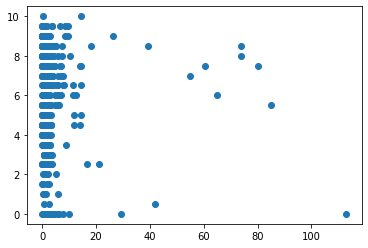

In [ ]:
plt.scatter(X['prob_solved/prob_submit'],y)
plt.show()

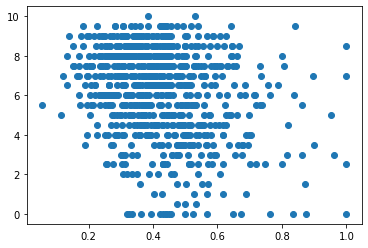

In [ ]:
plt.scatter(X['prob_sumbit/submissions'],y)
plt.show()

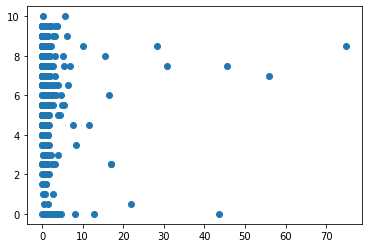

In [ ]:
plt.scatter(X['right_sumbit/submissions'],y)

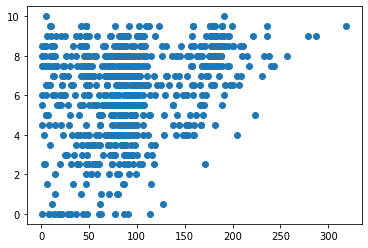

In [ ]:
plt.scatter(X['sum_is_final_1'],y)

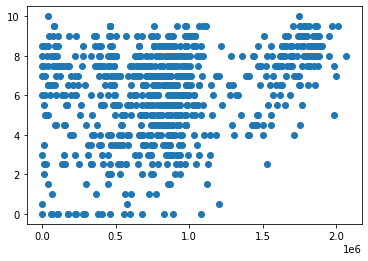

In [ ]:
plt.scatter(X['sum_max_scores'],y)